<h1> Smart Lead Scoring Engine

<h4>Import Relevant Libraries

In [2]:
import  warnings
warnings.filterwarnings("ignore")
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

<h4>Import dataset

In [5]:
df=pd.read_csv("train_wn75k28.csv")

<h4> Setting parameters

In [6]:
# setting matplotlib parameters 
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6,6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'xtick.color':'white',
         'ytick.color':'white'
         }

plt.rcParams.update(params)
%matplotlib inline

In [7]:
# setting seaborn parameters
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(6,6)})

<h4>EDA

In [8]:
df.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,01-01-2021,1,2,2.0,24-09-2020,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,01-01-2021,2,1,2.0,19-09-2020,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,01-01-2021,9,3,3.0,11-08-2021,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,01-01-2021,6,7,2.0,04-10-2017,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,01-01-2021,4,6,NaN,08-06-2020,0,0,0,0,0,0,1,0,0,0,1,0,0


In [9]:
df.shape

(39161, 19)

In [10]:
#general summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

In [11]:
#detailed summary of the data
df.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
count,39161.000000,39161.000000,39161.000000,18250.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000
mean,19581.000000,6.523812,6.452746,2.154137,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.011440,0.000383,0.218942,0.000562,0.051020
std,11304.951283,3.472944,2.614296,0.779815,0.509194,0.081676,0.303743,0.106463,0.359681,0.558166,0.455784,0.379689,0.106346,0.019568,0.431544,0.023696,0.220042
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9791.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19581.000000,6.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29371.000000,9.000000,8.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39161.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [12]:
df['buy'].value_counts()

0    37163
1     1998
Name: buy, dtype: int64

<AxesSubplot:xlabel='buy', ylabel='count'>

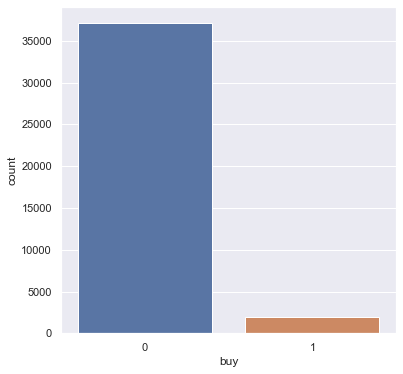

In [13]:
# plotting the count of 0's: 'won't buy' and 1's: 'would buy' in the target feature variable
sns.countplot(df['buy'])

In [14]:
# total num of null values per column in the data
df.isnull().sum()

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

In [15]:
# total num of duplicate rows in the data
df.duplicated().sum()

0

<h4> Handling missing values

In [16]:
df['products_purchased'].value_counts()

2.0    8867
3.0    5024
1.0    3643
4.0     716
Name: products_purchased, dtype: int64

<AxesSubplot:xlabel='products_purchased', ylabel='count'>

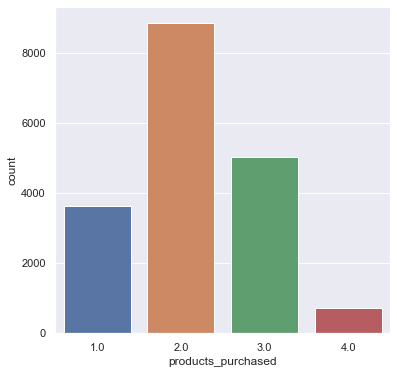

In [17]:
# plotting number of products purchased before filling mising values
sns.countplot(df['products_purchased'])

In [18]:
# filling missing values with 0: no products purchased
df['products_purchased']=df['products_purchased'].fillna(0)

<AxesSubplot:xlabel='products_purchased', ylabel='count'>

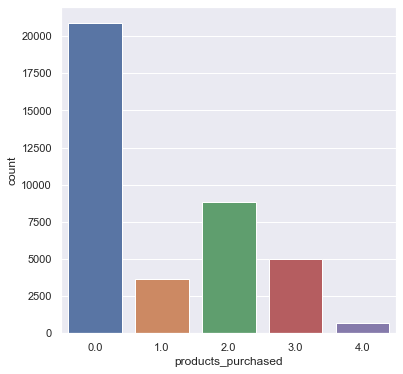

In [19]:
# plotting number of products purchased after filling mising values
sns.countplot(df['products_purchased'])

In [20]:
# changing datatype of 'products_purchased' to int
df['products_purchased']=df['products_purchased'].astype('int64')

<h4> Adding custom features: creating new feature variable from 'created_at' and 'signup_date'

In [21]:
# convert feature var to datatime type
df['created_at']=pd.to_datetime(df['created_at'])
df['signup_date']=pd.to_datetime(df['signup_date'])

In [22]:
df['diff_days']=(df['created_at']-df['signup_date']).dt.days

<h4> Removing unnecessary feature variables

In [23]:
df.drop(columns=['id', 'created_at', 'signup_date'],inplace=True)

In [24]:
df.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,diff_days
0,1,2,2,0,0,0,0,0,0,1,1,0,0,0,0,0,99.0
1,2,1,2,1,0,1,0,0,0,1,0,0,0,0,0,0,104.0
2,9,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,-311.0
3,6,7,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1362.0
4,4,6,0,0,0,0,0,0,0,1,0,0,0,1,0,0,148.0


In [25]:
# filling null values in diff_created_signup
df['diff_days'].fillna(df['diff_days'].mean(),inplace=True)

In [26]:
df.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,diff_days
0,1,2,2,0,0,0,0,0,0,1,1,0,0,0,0,0,99.0
1,2,1,2,1,0,1,0,0,0,1,0,0,0,0,0,0,104.0
2,9,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,-311.0
3,6,7,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1362.0
4,4,6,0,0,0,0,0,0,0,1,0,0,0,1,0,0,148.0


<h4> Feature Selection

In [27]:
# selecting 10 most prominent features
model = ExtraTreesClassifier()
model.fit(df.drop(["buy"], axis=1), df["buy"])
feat_importances = pd.Series(model.feature_importances_, index=df.drop(["buy"], axis=1).columns)
feat_importances.nlargest(10)

diff_days               0.217816
user_activity_var_9     0.176976
user_activity_var_4     0.121390
user_activity_var_11    0.100498
user_activity_var_2     0.098216
campaign_var_1          0.077292
campaign_var_2          0.075582
products_purchased      0.038888
user_activity_var_5     0.023338
user_activity_var_6     0.020943
dtype: float64

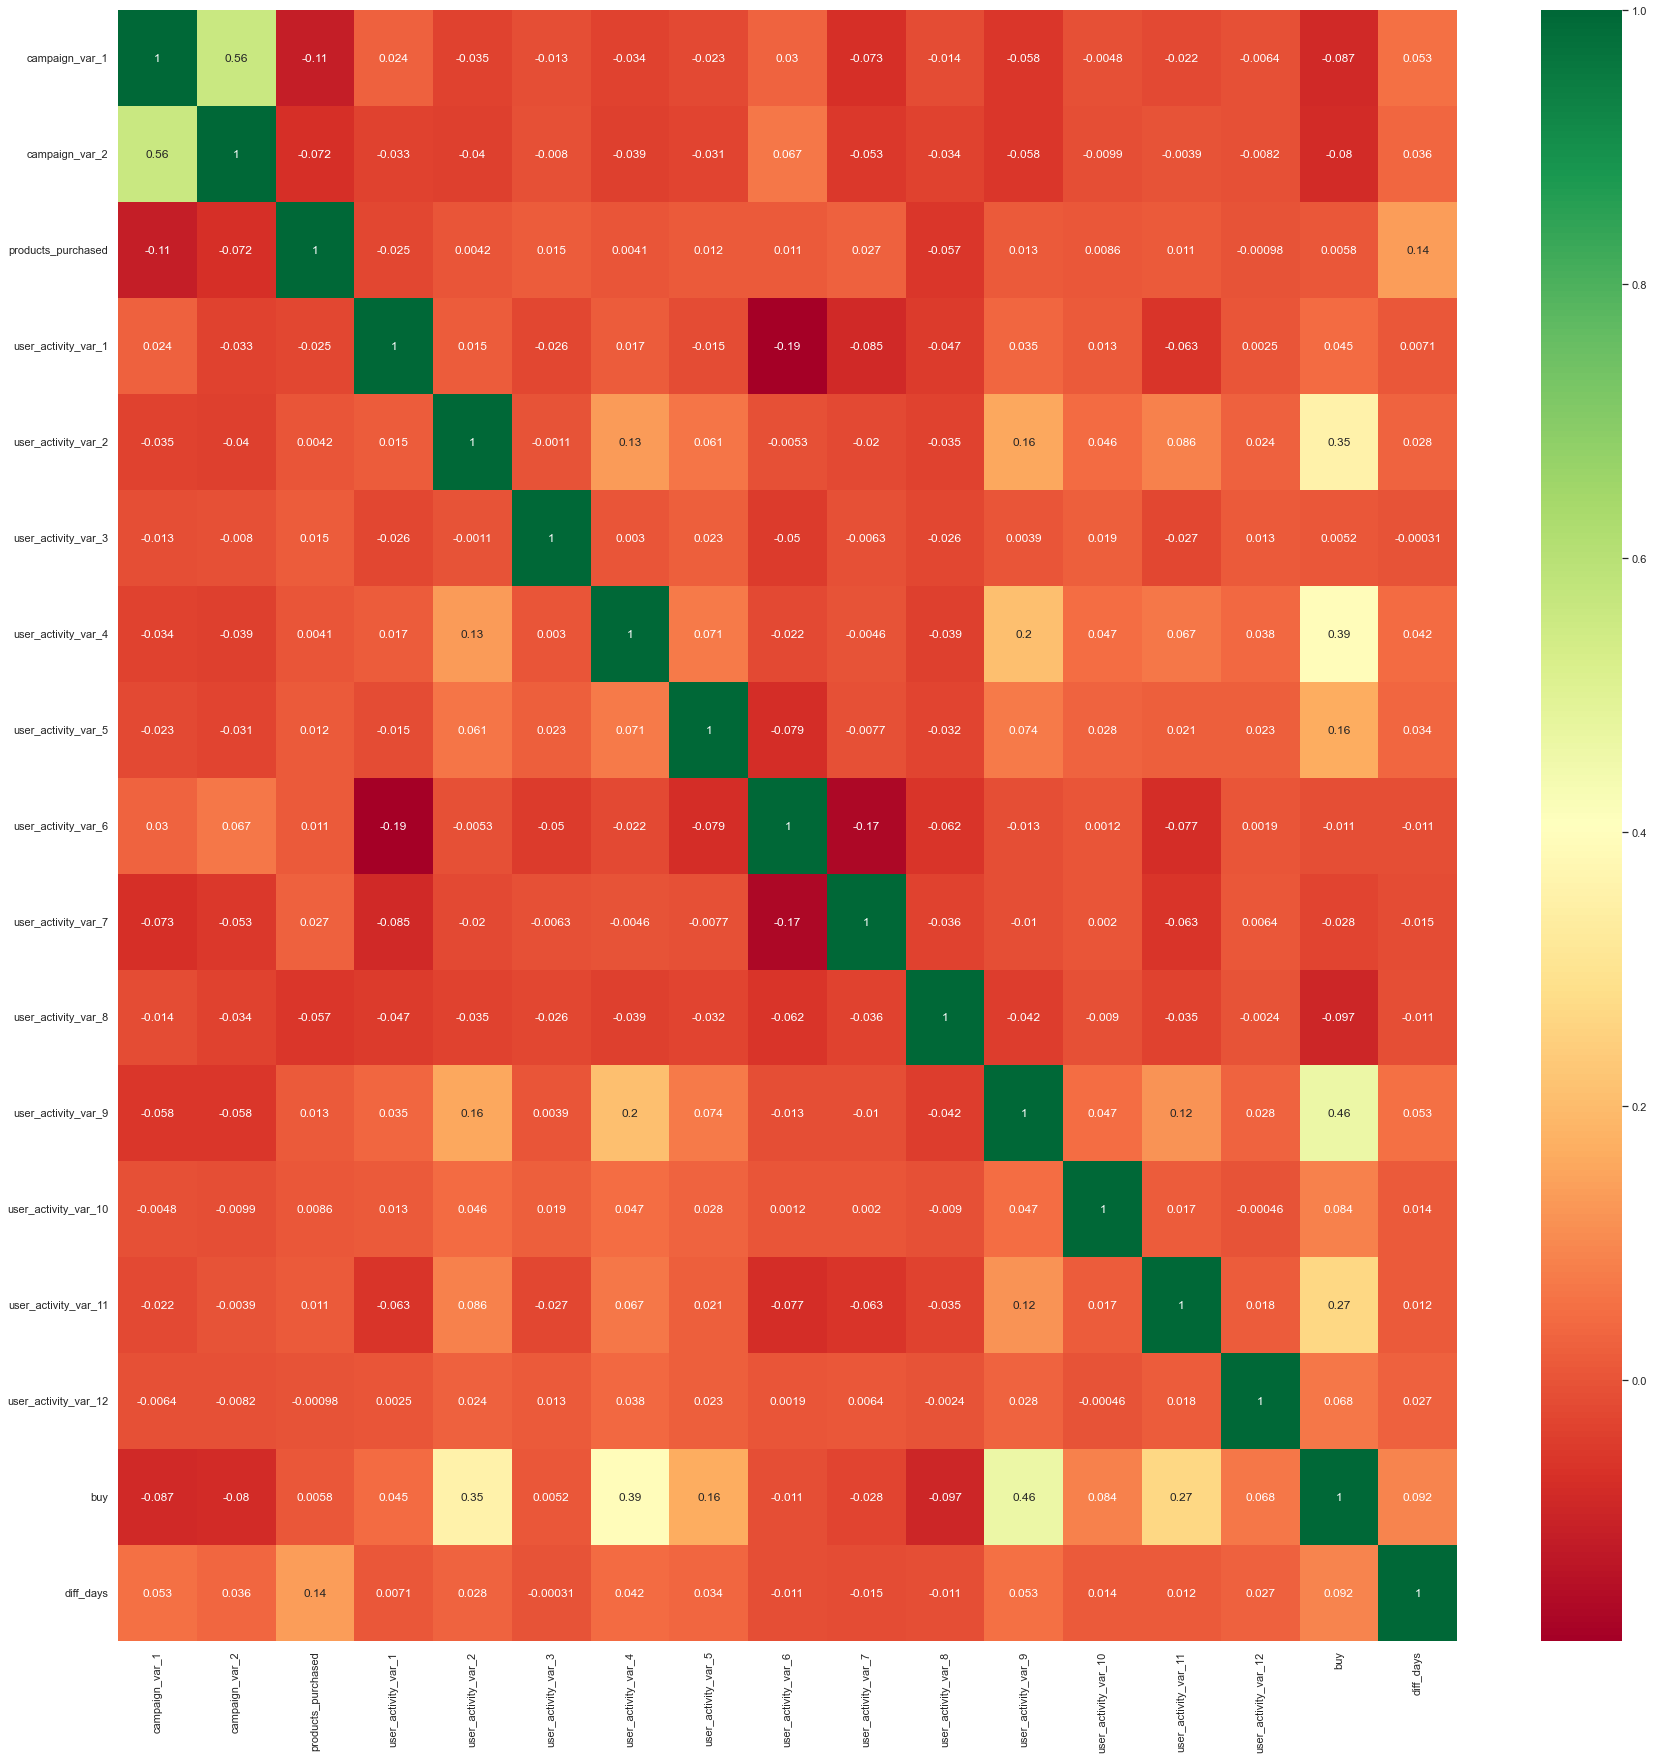

In [28]:
# correlation matrix
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
# heatmap
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [29]:
# list of all the selected features for model building
selected_features=['diff_days' ,              
'user_activity_var_9',
'user_activity_var_4' ,    
'user_activity_var_11' ,   
'user_activity_var_2',  
'campaign_var_1',          
'campaign_var_2' ,         
'products_purchased' ,      
'user_activity_var_5' ,    
'user_activity_var_6' ]

In [30]:
# dropping other less relevant features
df.drop(columns=['user_activity_var_12',
'user_activity_var_10',
'user_activity_var_3',
'user_activity_var_8',
'user_activity_var_7',
'user_activity_var_1'],inplace=True)

In [31]:
df.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_2,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_9,user_activity_var_11,buy,diff_days
0,1,2,2,0,0,0,0,0,0,0,99.0
1,2,1,2,0,0,0,0,0,0,0,104.0
2,9,3,3,0,0,0,0,0,0,0,-311.0
3,6,7,2,0,0,0,0,0,0,0,1362.0
4,4,6,0,0,0,0,0,0,1,0,148.0


<h4>Feature scaling

In [32]:
X=df.drop(columns=['buy'])

In [33]:
#scaling numerical features
scaler = StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [34]:
y=df[['buy']]

In [35]:
X.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_2,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_9,user_activity_var_11,diff_days
0,-1.590548,-1.703251,0.830647,-0.082227,-0.107696,-0.42122,-0.895506,-0.107575,-0.507352,-0.599306
1,-1.302604,-2.085768,0.830647,-0.082227,-0.107696,-0.42122,-0.895506,-0.107575,-0.507352,-0.583493
2,0.713003,-1.320734,1.664531,-0.082227,-0.107696,-0.42122,-0.895506,-0.107575,-0.507352,-1.895966
3,-0.150828,0.209334,0.830647,-0.082227,-0.107696,-0.42122,-0.895506,-0.107575,-0.507352,3.395039
4,-0.726716,-0.173183,-0.837120,-0.082227,-0.107696,-0.42122,-0.895506,-0.107575,1.809936,-0.444339


<h4> Train-test split

In [36]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

<h4> Model building

In [37]:
num_estimators = 100
min_samples = 4

rf = RandomForestClassifier(n_estimators=num_estimators,
                            min_samples_split=min_samples)
rf.fit(X_train, y_train.values.ravel())
y_pred = rf.predict(X_test)
y_pred = rf.predict(X_test)


<h4> Accuracy of the model

In [38]:
y_test_predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9744661095636026


<h4> Classification report

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12252
           1       0.91      0.57      0.70       672

    accuracy                           0.97     12924
   macro avg       0.94      0.78      0.84     12924
weighted avg       0.97      0.97      0.97     12924



<h4>Confusion matrix

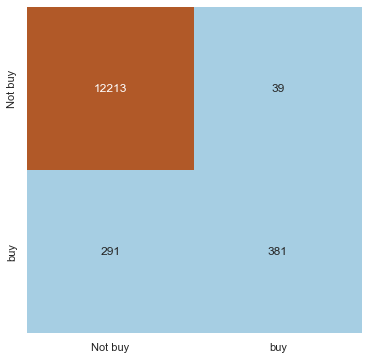

In [40]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(6,6)})
cmat = confusion_matrix(y_test, y_test_predicted)
plt.figure(figsize = (6, 6))
sns.heatmap(cmat, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not buy', 'buy'], yticklabels=['Not buy', 'buy']);

<h4> Pickling the model 

In [41]:
pickle.dump(rf,open('model.pkl','wb'))
pickled_model = pickle.load(open('model.pkl', 'rb'))